/tmp/ipykernel_178346/759243097.py:9: RuntimeWarning: divide by zero encountered in log
  term2 = np.log(1 - erf(a))
/tmp/ipykernel_178346/759243097.py:13: RuntimeWarning: invalid value encountered in multiply
  return term1 * (term2 + term3) + term4 + term5


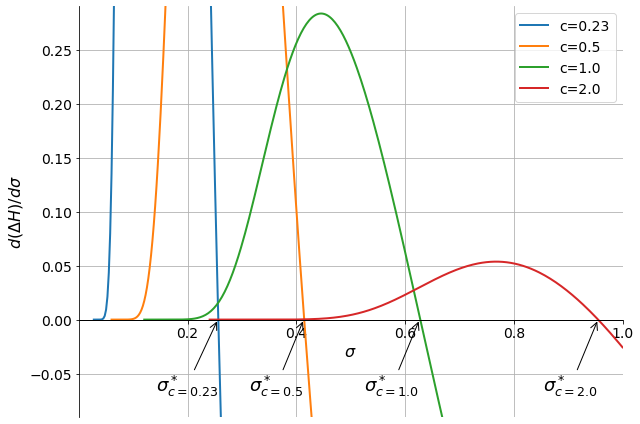

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Define the new function
def delta_H_new(sigma, c):
    a = c / (sigma * np.sqrt(2))
    term1 = - (2 * a / (np.sqrt(np.pi) * sigma)) * np.exp(-a**2)
    term2 = np.log(1 - erf(a))
    term3 = 1 - np.log(2 * a / (c * np.sqrt(np.pi)))
    term4 = - (1 / sigma) * (1 - erf(a))
    term5 = - (a**3 / sigma) * np.exp(-a**2)
    return term1 * (term2 + term3) + term4 + term5

# Define the range of sigma values
sigma = np.linspace(1e-7, 1, 400)  # sigma should be > 0 to avoid division by zero

# Define the c values
c_values = [0.23, 0.5, 1.0, 2.0]

plt.figure(figsize=(9, 6))
for c in c_values:
    delta_H_values = delta_H_new(sigma, c)
    plt.plot(sigma, delta_H_values, label=f'c={c}', linewidth=2)

    # Find the last intersection point with the sigma axis (Delta H = 0)
    intersections = np.where(np.diff(np.sign(delta_H_values)))[0]
    if len(intersections) > 0:
        intersection_index = intersections[-1]
        sigma_star = sigma[intersection_index]
        plt.annotate(f'$\sigma_{{c={c}}}^*$', xy=(sigma_star, 0), xytext=(sigma_star, -0.05),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     horizontalalignment='right', verticalalignment='top', fontsize=18)

plt.xlabel(r'$\sigma$', fontsize=16)
plt.ylabel(r'$d(\Delta H)/d\sigma$', fontsize=16)
plt.xlim(1e-7, 1)
plt.ylim(-0.09, 0.29)
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at Delta H = 0

# Move the x-axis to the bottom of the graph at y=0 and adjust x-axis ticks
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')

# Remove the 0 tick on the sigma axis
xticks = ax.get_xticks()
xticks = xticks[xticks != 0]
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=14)

# remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Update the title
# plt.title(r'$\Delta H$ with respect to $\sigma$ for different c values', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()

# Save the plot as a PDF
plt.savefig("delta_H.pdf")
plt.show()


/tmp/ipykernel_2449084/3790102886.py:34: RuntimeWarning: divide by zero encountered in log
  term4 = -(1 - Phi(c / sigma)) * np.log((1 - Phi(c / sigma)) / (1.5 - Phi(c / sigma)))
/tmp/ipykernel_2449084/3790102886.py:34: RuntimeWarning: invalid value encountered in scalar multiply
  term4 = -(1 - Phi(c / sigma)) * np.log((1 - Phi(c / sigma)) / (1.5 - Phi(c / sigma)))


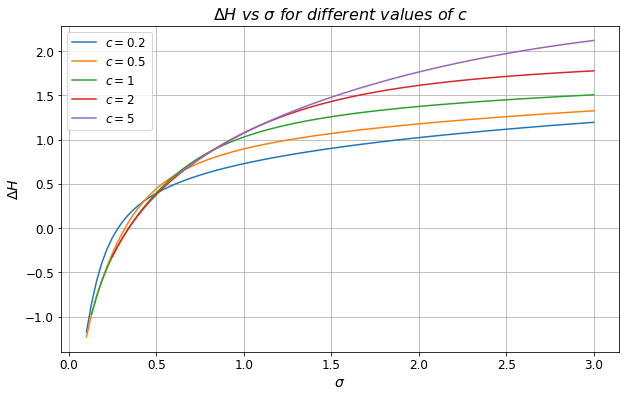

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy import integrate

# Define the standard normal CDF and PDF
def Phi(x):
    return 0.5 * (1 + erf(x / np.sqrt(2)))

def phi(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Define the truncated normal distribution function
def f(x, mu, sigma, a, b):
    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma
    Z = Phi(beta) - Phi(alpha)
    return (1 / sigma) * (phi((x - mu) / sigma) / Z)

# Define the H_c function
def H_c(mu, sigma, a, b):
    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma
    Z = Phi(beta) - Phi(alpha)
    term1 = np.log(np.sqrt(2 * np.pi * np.e * sigma**2 * Z))
    term2 = (alpha * phi(alpha) - beta * phi(beta)) / (2 * Z)
    return term1 + term2

# Define the delta_H function
def delta_H(sigma, c):
    term1 = -(1.5 - Phi(c / sigma)) * np.log(1.5 - Phi(c / sigma))
    term2 = -(Phi(c / sigma) - 0.5) * np.log(Phi(c / sigma) - 0.5)
    term3 = -0.5 * np.log(0.5 / (1.5 - Phi(c / sigma)))
    term4 = -(1 - Phi(c / sigma)) * np.log((1 - Phi(c / sigma)) / (1.5 - Phi(c / sigma)))
    term5 = (Phi(c / sigma) - 0.5) * H_c(0, sigma, 0, c)
    term6 = np.log(0.5)
    term7 = 0.5 * np.log(np.sqrt(np.pi * np.e * sigma))
    return term1 + term2 + term3 + term4 + term5 + term6 + term7

# Define the range of sigma values and the different c values
sigma_values = np.linspace(0.1, 3, 100)
c_values = [0.2, 0.5, 1, 2, 5]

# Plot delta_H for different values of c
plt.figure(figsize=(10, 6))

for c in c_values:
    delta_H_values = [delta_H(sigma, c) for sigma in sigma_values]
    plt.plot(sigma_values, delta_H_values, label=f'$c = {c}$')

plt.xlabel(r'$\sigma$', fontsize=14, fontstyle='italic')
plt.ylabel(r'$\Delta H$', fontsize=14, fontstyle='italic')
plt.title(r'$\Delta H$ vs $\sigma$ for different values of $c$', fontsize=16, fontstyle='italic')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


/tmp/ipykernel_2449084/598378333.py:33: RuntimeWarning: divide by zero encountered in log
  term3 = -(1 - Phi(c / sigma)) * np.log(1 - Phi(c / sigma))
/tmp/ipykernel_2449084/598378333.py:33: RuntimeWarning: invalid value encountered in scalar multiply
  term3 = -(1 - Phi(c / sigma)) * np.log(1 - Phi(c / sigma))


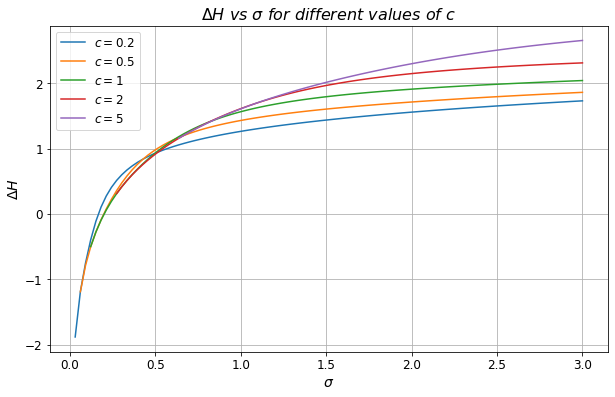

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy import integrate

# 定义标准正态分布的CDF和PDF
def Phi(x):
    return 0.5 * (1 + erf(x / np.sqrt(2)))

def phi(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# 定义截断正态分布的函数
def f(x, mu, sigma, a, b):
    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma
    Z = Phi(beta) - Phi(alpha)
    return (1 / sigma) * (phi((x - mu) / sigma) / Z)

# 定义 H_c 函数
def H_c(mu, sigma, a, b):
    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma
    Z = Phi(beta) - Phi(alpha)
    term1 = np.log(np.sqrt(2 * np.pi * np.e * sigma**2 * Z))
    term2 = (alpha * phi(alpha) - beta * phi(beta)) / (2 * Z)
    return term1 + term2

# 定义 delta_H 函数
def delta_H(sigma, c):
    term1 = -(Phi(c / sigma) - 0.5) * np.log(Phi(c / sigma) - 0.5)
    term2 = 0.5 * np.log(0.5)
    term3 = -(1 - Phi(c / sigma)) * np.log(1 - Phi(c / sigma))
    term4 = (Phi(c / sigma) - 0.5) * H_c(0, sigma, 0, c)
    term5 = 0.5 * np.log(np.pi * np.e * sigma)
    return term1 + term2 + term3 + term4 + term5

# 定义 sigma 的取值范围和不同的 c 值
sigma_values = np.linspace(0.0001, 3, 100)
c_values = [0.2, 0.5, 1, 2, 5]

# 绘制不同 c 值下的 delta_H 曲线
plt.figure(figsize=(10, 6))

for c in c_values:
    delta_H_values = [delta_H(sigma, c) for sigma in sigma_values]
    plt.plot(sigma_values, delta_H_values, label=f'$c = {c}$')

plt.xlabel(r'$\sigma$', fontsize=14, fontstyle='italic')
plt.ylabel(r'$\Delta H$', fontsize=14, fontstyle='italic')
plt.title(r'$\Delta H$ vs $\sigma$ for different values of $c$', fontsize=16, fontstyle='italic')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


/tmp/ipykernel_2449084/3658955849.py:11: RuntimeWarning: divide by zero encountered in log
  term2 = -(np.log(1 - Phi(c / sigma)) + 1) * phi(c / sigma) * c / sigma**2
/tmp/ipykernel_2449084/3658955849.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  term2 = -(np.log(1 - Phi(c / sigma)) + 1) * phi(c / sigma) * c / sigma**2


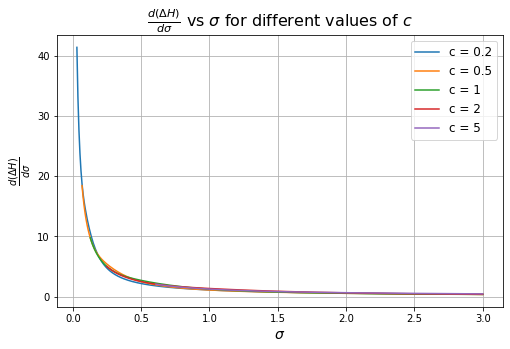

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the function
def dH_dsigma(sigma, c):
    phi = norm.pdf
    Phi = norm.cdf
    
    term1 = (np.log(Phi(c / sigma) - 0.5) + 1) * phi(c / sigma) * c / sigma**2
    term2 = -(np.log(1 - Phi(c / sigma)) + 1) * phi(c / sigma) * c / sigma**2
    term3 = 1 / sigma
    term4 = -c * phi(c / sigma) / (2 * sigma**2 * Phi(c / sigma))
    term5 = (-phi(c / sigma) / (2 * (Phi(c / sigma))**2)) * (c * (c**2 - sigma**2) / sigma**4 * Phi(c / sigma) + c**2 / sigma**3 * phi(c / sigma))
    term6 = 1 / (4 * sigma)
    
    return term1 + term2 + term3 + term4 + term5 + term6

# Sigma values
sigma_values = np.linspace(0.0001, 3, 400)

# Values of c to be used
c_values = [0.2, 0.5, 1, 2, 5]

# Plotting
plt.figure(figsize=(8, 5))  # Smaller figure size

for c in c_values:
    dH_values = [dH_dsigma(sigma, c) for sigma in sigma_values]
    plt.plot(sigma_values, dH_values, label=f'c = {c}')

plt.xlabel(r'$\sigma$', fontsize=14)  # Larger font size
plt.ylabel(r'$\frac{d (\Delta H)}{d\sigma}$', fontsize=14)  # Larger font size
plt.title(r'$\frac{d (\Delta H)}{d\sigma}$ vs $\sigma$ for different values of $c$', fontsize=16)  # Larger font size
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the labels
plt.savefig("ddelta_H.pdf")
plt.show()
